# Problem 1

### Library import & Deta set

In [142]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize

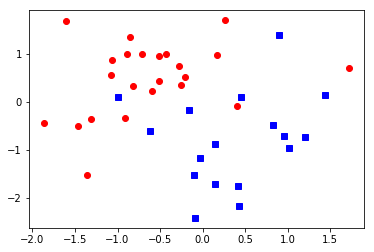

In [143]:
n = 40
omega = np.random.randn(1, 1)
noise = 0.8 * np.random.randn(n, 1)
x = np.random.randn(n, 2)
y = 2 * ((omega * x[:, 0] + x[:, 1] + noise[:, 0]) > 0) - 1
data = np.c_[x, y.T]

def plotData(data, axes=None):
    # Get indexes for class -1 and class 1
    neg = data[:,2] == -1
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    plt.plot(data[pos][:,0], data[pos][:,1], 'o', color='red')
    plt.plot(data[neg][:,0], data[neg][:,1], 'gs', color='blue');
    
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

plotData(data)

### Problem 1-1

$$ J({\rm\omega}):=\sum_{i=1}^{n}(\ln(1+\exp(-y_{i}{\rm{\omega}}^{T}x_{i})))+\lambda{\rm \omega}^{T}\omega$$

In [144]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))


def J(w):
    """
    Cost function
    """
    return sum(np.log(1 + np.exp( y * np.array(np.dot(X, w))))) + l * np.dot(w.T, w)


def gradient(w):
    return (sum(-y * X * (1 - sigmoid(y * np.array(np.dot(X, w))))) + 2 * l * w.T).T


def descent(initial_position, learning_rate, t):
    """
    勾配法で最小値を求める関数
    :param function J: 最小値を見つけたい関数
    :param numpy.ndarray initial_position: 関数の初期位置
    :param float learning_rate: 学習率
    :param int t: 学習回数
    """
    w = initial_position
    for _ in range(t):
        grad = gradient(w)
        w -= learning_rate * grad
    return w


def descent_pic(J, initial_position, learning_rate, t):
    """
    勾配の収束を可視化する関数
    :param function J: 最小値を見つけたい関数
    :param numpy.ndarray initial_position: 関数の初期位置
    :param float learning_rate: 学習率
    :param int t: 学習回数
    """
    w = initial_position
    for i in range(t):
        plt.plot(i, J(w), 'o', color = 'Black', markersize = 2)
        plt.ylabel('Loss-function: J(w)')
        plt.xlabel('interation: t')
        grad = gradient(w)
        w -= learning_rate * grad
    plt.plot(i, J(w), 'o', color = 'Black', markersize = 2, label = 'Batch steepest gradient method')
    plt.legend()


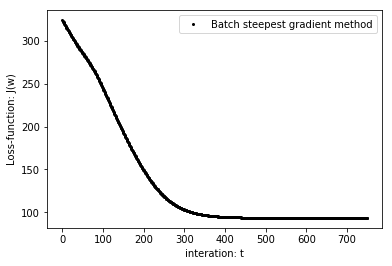

In [145]:
l = 0.1
w0 = np.array([[10], [10], [10]], dtype = np.float64)
t = 750
learning_rate = 0.01

descent_pic(J, w0, learning_rate, t)

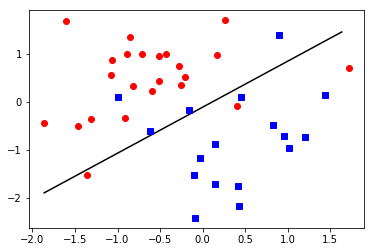

In [146]:
w1_best = descent(w0, learning_rate, t)
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
x1 = np.arange(x1_min, x1_max, 0.1)
x2 = -(w1_best[1]/w1_best[2])*x1 - (w1_best[0]/w1_best[2])

plt.plot(x1.T, x2.T, color = 'Black')
plotData(data)

### Problem 1-2

In [147]:
def hessian(w):
    I = np.eye(3)
    p = sigmoid(y * np.array(np.dot(X, w)))
    xx = []
    pp = []
    for i in range(n):
        xx.append(np.matrix(np.dot(np.matrix(X[i, :]).T, np.matrix(X[i, :]))))
        
    for i in range(n):
        pp.append(np.ones((3, 3)) * p[i, :])
        
    return sum(pp*(np.ones_like(pp) - pp) * xx) + 2*l*I


def newton(initial_position, learning_rate, t):
    """
    Newton法で最小値を求める関数
    :param function J: 最小値を見つけたい関数
    :param numpy.ndarray initial_position: 関数の初期位置
    :param float learning_rate: 学習率
    :param int t: 学習回数
    """
    w = initial_position
    for _ in range(t):
        grad = gradient(w)
        inv_h = np.linalg.inv(hessian(w))
        direction = np.dot(inv_h, grad)
        w -= learning_rate * direction
    return w


def newton_pic(J, initial_position, learning_rate, t):
    """
    勾配の収束を可視化する関数
    :param function J: 最小値を見つけたい関数
    :param numpy.ndarray initial_position: 関数の初期位置
    :param float learning_rate: 学習率
    :param int t: 学習回数
    """
    w = initial_position
    for i in range(t):
        plt.plot(i, J(w), 'gs', color = 'Red', markersize = 2)
        plt.ylabel('Loss-function: J(w)')
        plt.xlabel('interation: t')
        grad = gradient(w)
        inv_h = np.linalg.inv(hessian(w))
        direction = np.dot(inv_h, grad)
        w -= learning_rate * direction
    plt.plot(i, J(w), 'gs', color = 'Red', markersize = 2, label = 'Newton based method')
    plt.legend()

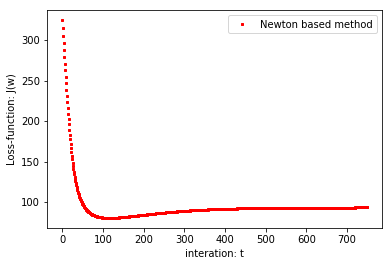

In [148]:
l = 0.1
w0 = np.array([[10], [10], [10]], dtype = np.float64)
t = 750
learning_rate = 0.01
newton_pic(J, w0, learning_rate, t)

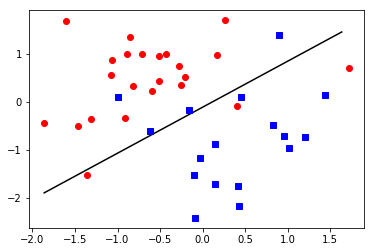

In [149]:
w2_best = newton(w0, learning_rate, t)
x1_n = np.arange(x1_min, x1_max, 0.1)
x2_n = -(w2_best[1]/w2_best[2])*x1 - (w2_best[0]/w2_best[2])

plt.plot(x1_n.T, x2_n.T, color = 'Black')
plotData(data)

### Problem 1-3

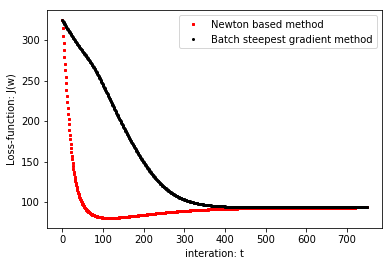

In [150]:
l = 0.1
w0 = np.array([[10], [10], [10]], dtype = np.float64)
t = 750
learning_rate = 0.01
newton_pic(J, w0, learning_rate, t)


w0 = np.array([[10], [10], [10]], dtype = np.float64)
descent_pic(J, w0, learning_rate, t)